# PCA

Principal Component Analysis is an analytical technique that can be used to catogorise subsets of a set of data. To build the model it initially requires a set of independent variables

### Required Packages:

pandas <br>
numpy <br>
sklean <br>
matplotlib

## Import Data

All data (training, validation, testing) is imported from a csv of format without the header or column names
<br>

|    | ind1 | ind2 | ind3 | ind4 | ind5 | ... 
| --- | --- | --- | --- | --- | --- | --- 
| spectra 1 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | ...  
| spectra 2 | 5.0 | 5.3 | 6.5 | 7.7 | 8.0 | ... 
| spectra 3 | 4.3 | 5.6 | 6.5 | 7.0 | 8.1 | ... 
| spectra 4 | 4.2 | 5.2 | 6.3 | 7.3 | 8.2 | ...  
| spectra 5 | 4.6 | 4.9 | 6.3 | 7.4 | 8.5 | ...  
| spectra 6 | 5.7 | 5.7 | 6.7 | 7.3 | 8.6 | ... 



In [62]:
""" #Uncommment if you have not installed these packages in your python environment
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install scikit-learn
#"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

file = r"C:\Users\omguser\OneDrive - University of St Andrews (1)\Documents\Data for Other People\George god1\Ghanaian Bitters\Raw Data\merged.csv"

data = pd.read_csv(file, index_col =0)
data

,70.21813058,73.82822379,77.43626011,81.05826328,84.66218194,88.26404897,91.86386613,95.46163516,99.05735782,102.6670032,...,4442.556224,4443.788072,4445.019554,4446.250671,4447.481422,4448.711808,4449.941829,4451.164616,4452.39391,4453.622838
2F1,-6.30,-5.15,1.74,-2.92,-277.76,-287.04,-280.56,-345.52,-427.94,-449.25,...,-408.98,-406.96,-355.19,-320.01,-278.64,-361.43,14.03,0.87,-1.85,-11.84
2F2,1.33,-1.53,2.41,-2.26,-224.65,-383.18,-231.49,-346.87,-216.18,-422.36,...,-321.43,-362.91,-363.61,-325.38,-246.72,-388.97,12.71,-3.43,2.77,-12.17
2F3,7.30,8.37,0.42,-2.26,-168.17,-355.95,-251.65,-266.15,-331.33,-432.44,...,-257.78,-439.58,-312.05,-319.34,-231.61,-325.48,22.61,3.51,-12.09,-12.17
2F4,-9.61,-6.47,-0.57,-9.19,-232.72,-316.62,-260.73,-398.32,-406.06,-407.23,...,-379.01,-455.72,-355.53,-386.86,-290.06,-414.17,29.54,-0.45,-10.10,-9.20
2F5,0.00,10.02,-5.85,-15.46,-334.91,-279.64,-238.88,-305.83,-279.14,-321.85,...,-353.08,-554.91,-286.09,-356.96,-223.88,-391.32,10.40,-1.78,8.38,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WW6,-3.48,9.53,7.52,-9.03,-388.85,-392.09,-228.29,-476.83,-394.78,-442.36,...,-419.25,-553.39,-401.87,-417.94,-220.35,-430.12,8.91,-12.18,0.96,3.84
WW7,-0.33,6.72,-1.23,-5.89,-349.36,-371.75,-310.80,-387.89,-335.03,-493.62,...,-323.11,-355.51,-389.57,-412.73,-342.12,-427.94,17.00,-0.12,2.11,-11.84
WW8,6.14,2.27,-6.68,-2.42,-382.13,-373.27,-267.95,-343.00,-415.31,-410.43,...,-390.29,-544.65,-470.95,-420.29,-357.74,-399.22,6.60,-2.60,6.57,-1.44
WW9,-2.15,6.89,6.86,-12.66,-338.10,-424.02,-305.60,-389.74,-336.88,-453.12,...,-485.57,-500.61,-425.79,-357.13,-273.43,-378.39,12.21,-3.92,-0.70,-1.77


In [63]:
#Test for NANs

nan_rows = data.isna().any(axis=1)
for i in range(len(nan_rows)):
    if nan_rows.iloc[i] == True:
        print(f"{nan_rows.iloc[i]}   {i}")
        print(data.loc[[i]])
    else:
        print(f"{nan_rows.iloc[i]}   {i}")

False   0
False   1
False   2
False   3
False   4
False   5
False   6
False   7
False   8
False   9
False   10
False   11
False   12
False   13
False   14
False   15
False   16
False   17
False   18
False   19
False   20
False   21
False   22
False   23
False   24
False   25
False   26
False   27
False   28
False   29
False   30
False   31
False   32
False   33
False   34
False   35
False   36
False   37
False   38
False   39
False   40
False   41
False   42
False   43
False   44
False   45
False   46
False   47
False   48
False   49
False   50
False   51
False   52
False   53
False   54
False   55
False   56
False   57
False   58
False   59
False   60
False   61
False   62
False   63
False   64
False   65
False   66
False   67
False   68
False   69
False   70
False   71
False   72
False   73
False   74
False   75
False   76
False   77
False   78
False   79
False   80
False   81
False   82
False   83
False   84
False   85
False   86
False   87
False   88
False   89
False   90
False   9

### PCA over the full data sample

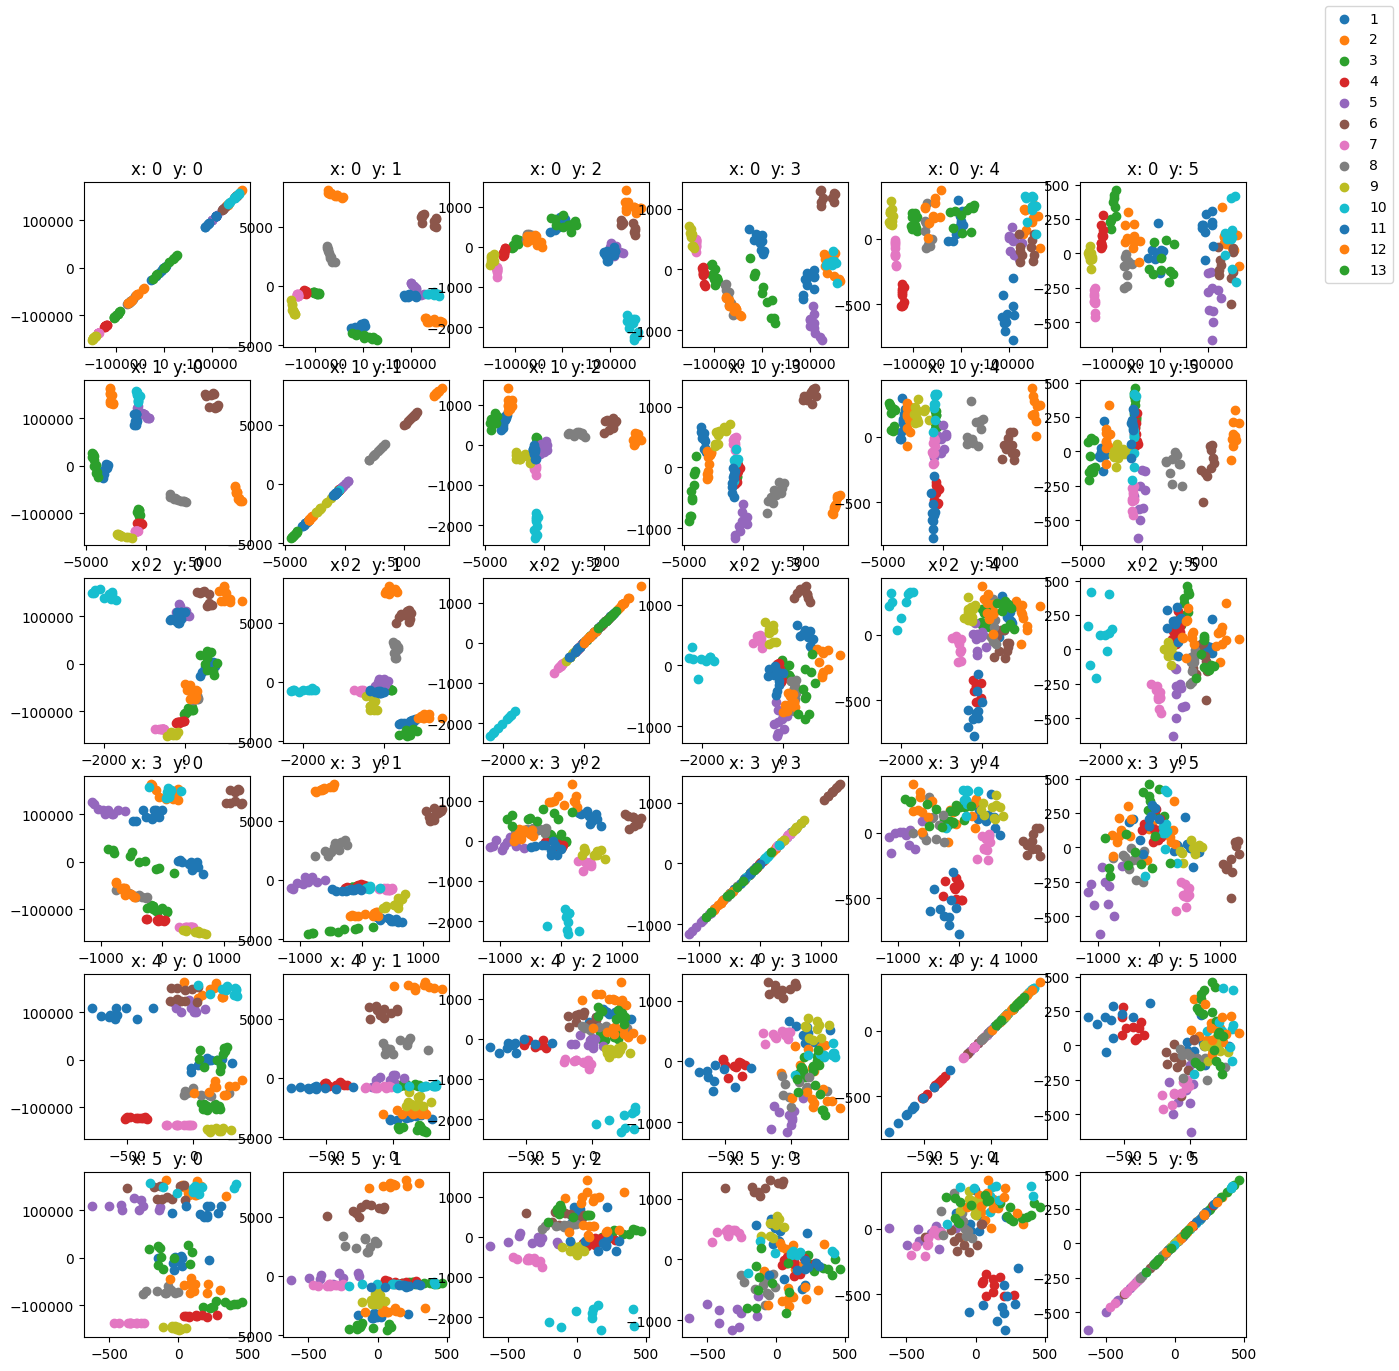

In [64]:
place = data.iloc[0:len(data),:]
X_colnames = data.columns[:len(data)]
X = place[X_colnames].values

numComponents = 6 #number of elements in the PCA
pca = PCA(n_components=numComponents).fit(X)

reduced_data = pca.transform(X)


fig, ax = plt.subplots(numComponents, numComponents, figsize=(15, 15), label = file)


numLines = 13 #number of samples
nSamples = 10 #number of repeats of each sample
for i in range(0,numLines):
    for n in range(numComponents):
        for m in range(numComponents):
            ax[n,m].scatter(reduced_data[i*nSamples:i*nSamples+nSamples,n], reduced_data[i*nSamples:i*nSamples+nSamples, m], label=("x: " + str(n) + "y: " +str(m)))
            ax[n,m].set_title(("x: " + str(n) + "  y: " +str(m)))
            ax[n,m].set_xlabel=f"{n} feature"
            ax[n,m].set_ylabel=f"{m} feature"

fig.legend(np.arange(1,numLines+1), loc = "upper right")